In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# 3months worh of upcoming acquitions
df1 = pd.read_csv('45_november.csv') # next 30 days
df2 = pd.read_csv('45_december.csv') # 30-60 days
df3 = pd.read_csv('45_january.csv') # 60-90 days
df = pd.concat([df1,df2,df3], ignore_index=True)
print(len(df))
df.head(3)

197


,center,centerEcef,spacecraftId,accessId,accessrequestId,tileId,windowOpen,windowClose,windowOpenLocal,windowCloseLocal,orbitalPlane,accessProperties.ascdsc,accessProperties.lookDirection,accessProperties.localTime,accessProperties.azimuthOpen,accessProperties.azimuthClose,accessProperties.elevationMin,accessProperties.elevationMax,accessProperties.offNadirMin,accessProperties.offNadirMax
0,"[-121.74456152276731, 46.796419718867014, 1589]","[-2301990.5719233174, -3720764.535683864, 4627...",10,192f6386-80ae-4f47-bd3b-e58c895e8384,59b77777-dcca-4224-bbbf-1ea8ebe2ca34,519f4079-a30f-4c4f-a9dd-d8375d15c889,2023-11-14T16:19:38.011Z,2023-11-14T16:21:29.980Z,2023-11-14T08:19:38.011Z,2023-11-14T08:21:29.980Z,45,ascending,left,29597,188.762047,130.416281,33.179191,37.418196,46.627977,49.999943
1,"[-121.74456144254492, 46.79641971954039, 1589]","[-2301990.5666849925, -3720764.5388605706, 462...",9,63626d67-9ba4-47bd-99fa-f6c956b5c46e,59b77777-dcca-4224-bbbf-1ea8ebe2ca34,edf42dc2-a8ff-46bf-9c3e-97ab5eb2ccff,2023-11-14T16:35:43.063Z,2023-11-14T16:38:22.338Z,2023-11-14T08:35:43.063Z,2023-11-14T08:38:22.338Z,45,ascending,left,30586,208.318638,118.863740,33.276584,43.992840,41.234873,49.999531
2,"[-121.74456152276731, 46.796419718867014, 1589]","[-2301990.5719233174, -3720764.535683864, 4627...",10,ad3e7e83-3358-4bb6-8ff8-bc587b8de085,59b77777-dcca-4224-bbbf-1ea8ebe2ca34,519f4079-a30f-4c4f-a9dd-d8375d15c889,2023-11-14T17:59:35.939Z,2023-11-14T18:01:52.544Z,2023-11-14T09:59:35.939Z,2023-11-14T10:01:52.544Z,45,ascending,left,35607,244.669901,143.576684,33.189536,53.832755,32.692796,49.999522


In [4]:
# Even distribution of acquisitions
df.spacecraftId.value_counts()

10    100
9      97
Name: spacecraftId, dtype: int64

In [5]:
df['windowOpenLocal'] = pd.to_datetime(df.windowOpenLocal)

In [6]:
df.windowOpenLocal.is_monotonic_increasing

True

In [7]:
access_df_summary = df.groupby(['orbitalPlane',
            'accessProperties.ascdsc', 
            'accessProperties.lookDirection'
           ]).agg(passCount=('windowOpen', 'count')
                 #  LookDirAzimuth=('LookDirectionAzimuth[degrees]', 'mean'),
                 # LookDirAzimuthStd=('LookDirectionAzimuth[degrees]', 'std'),
                 #  SatAzimuth = ('SatelliteAzimuth[degrees]', 'mean')
                 ).reset_index().rename(columns = {'accessProperties.ascdsc': 'orbitState', 'accessProperties.lookDirection': 'lookDirection'})
access_df_summary

,orbitalPlane,orbitState,lookDirection,passCount
0,45,ascending,left,197


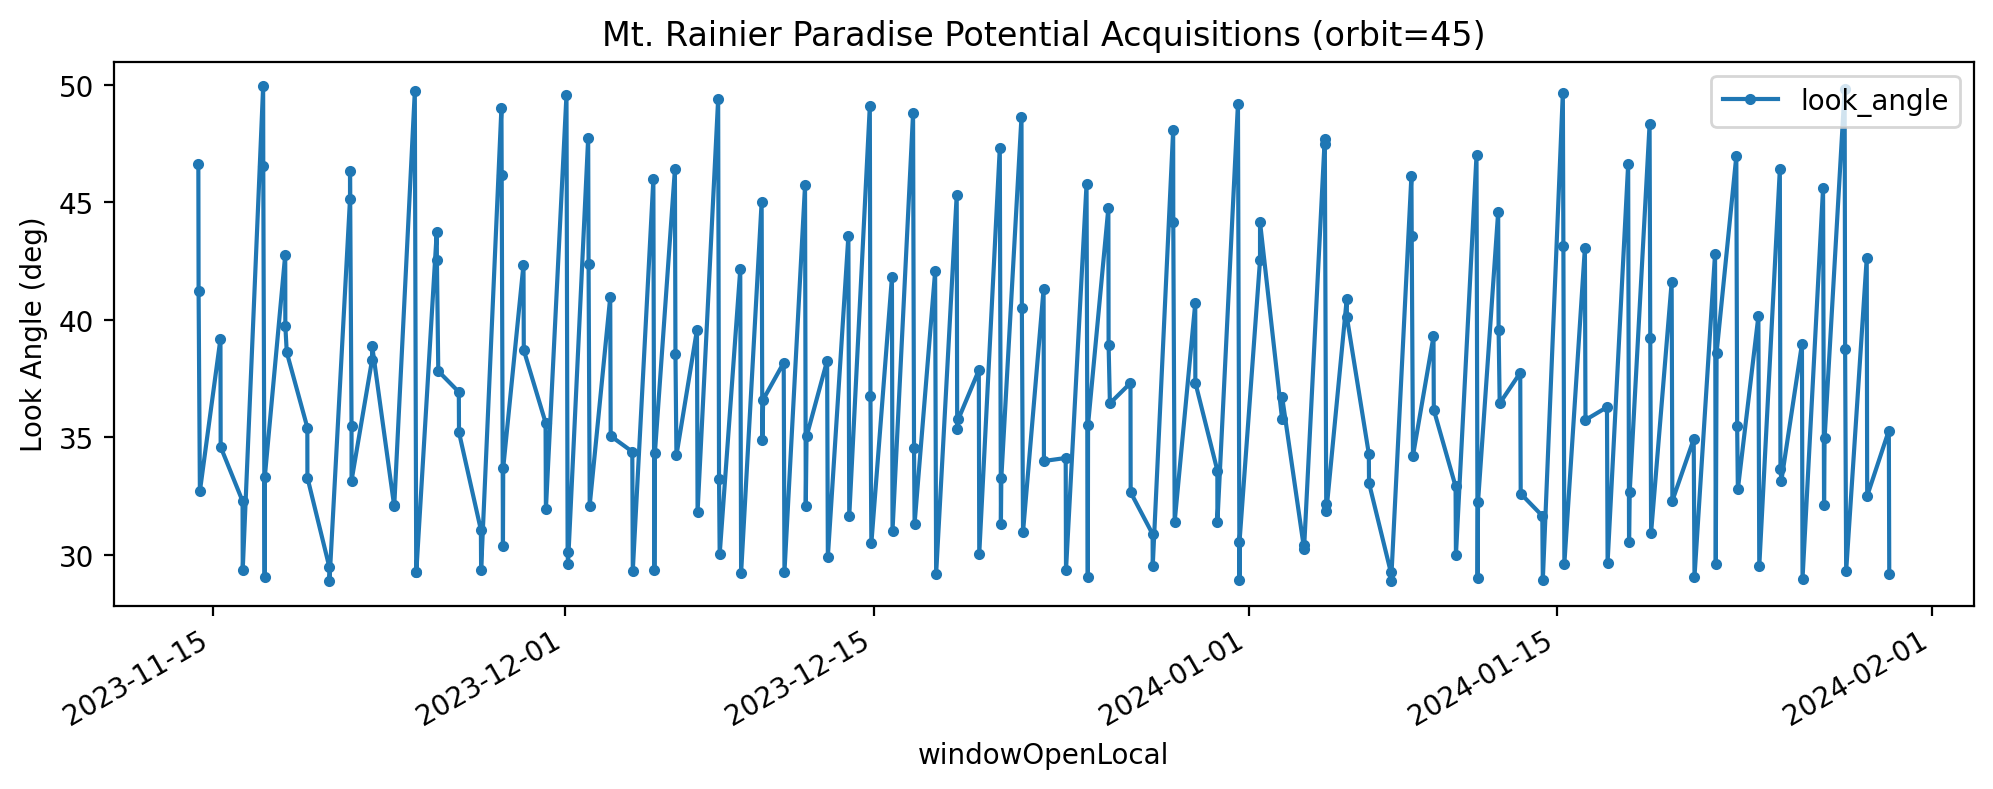

In [8]:
# # For a given combination of orbitState and lookDirection, how do acquisitions vary over time?
# Use STAC Names for anaylsis
df = df.rename(columns = {'accessProperties.ascdsc': 'orbit_state', 
                           'accessProperties.lookDirection': 'observation_direction',
                           'accessProperties.offNadirMin': 'look_angle'}) 

fig,ax = plt.subplots(figsize=(12,4))
df.plot(x='windowOpenLocal', y='look_angle', marker='.', ax=ax)
plt.ylabel('Look Angle (deg)')
plt.title('Mt. Rainier Paradise Potential Acquisitions (orbit=45)');

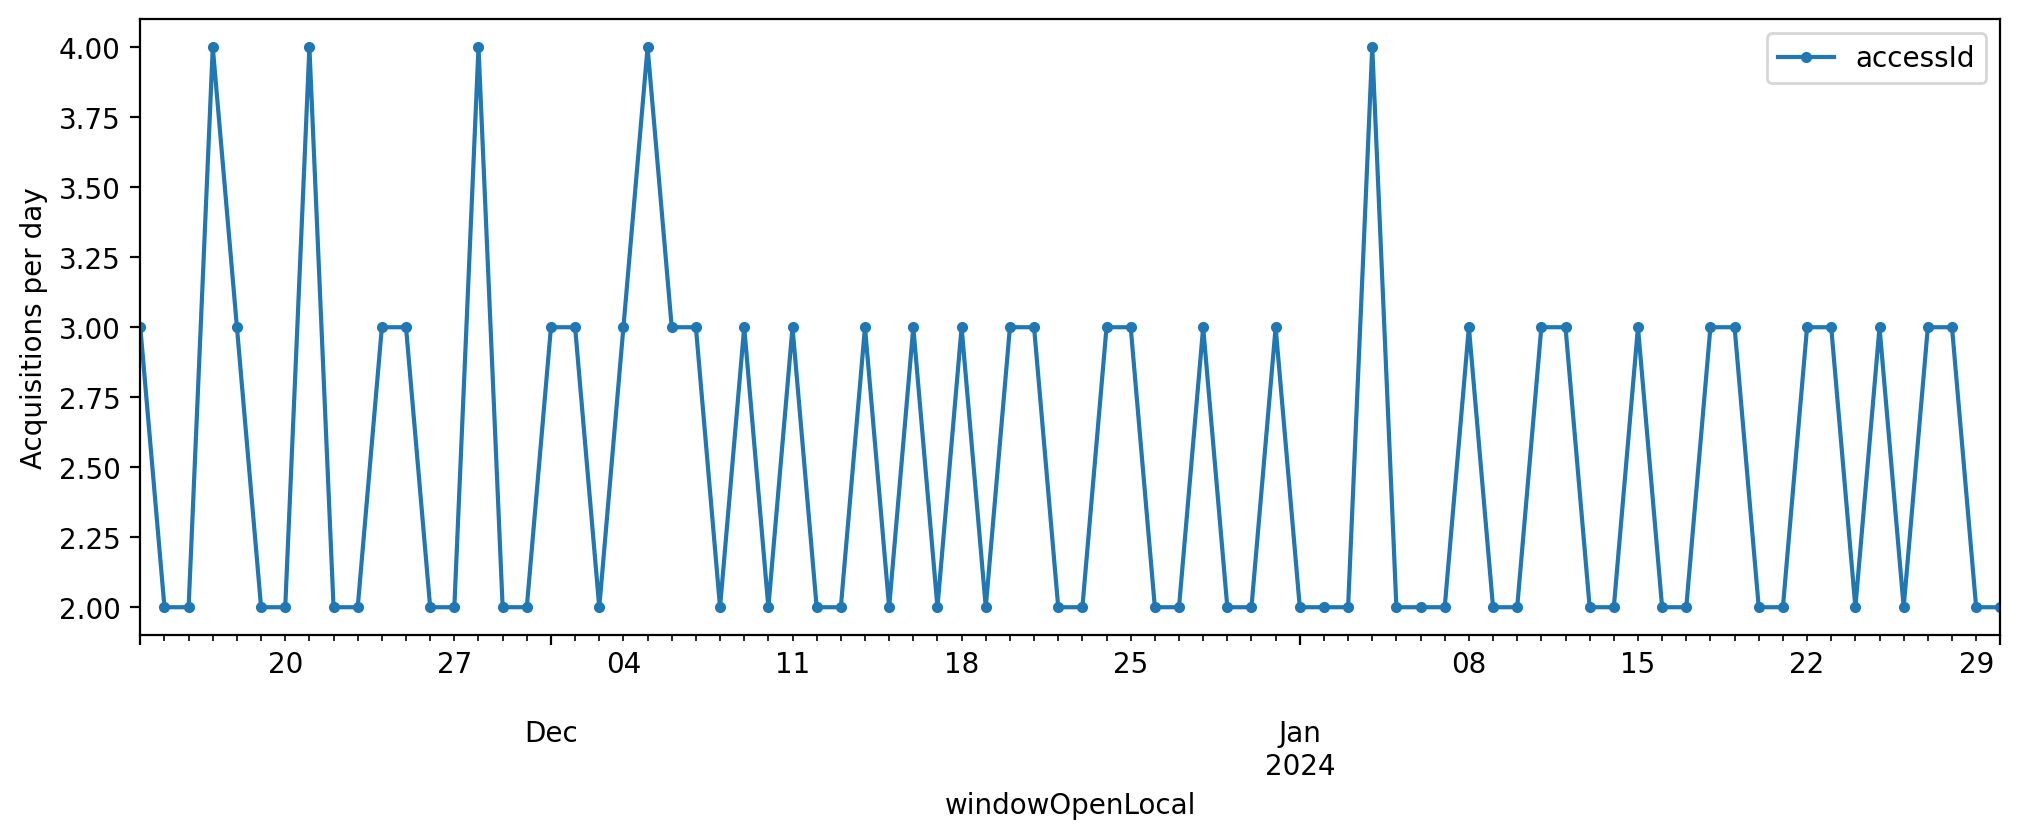

In [9]:
fig,ax = plt.subplots(figsize=(12,4))
tmp = df.set_index('windowOpenLocal')
tmp.resample('1D').apply({'accessId':'count'}).plot(ax=ax, marker='.')
plt.ylabel('Acquisitions per day');

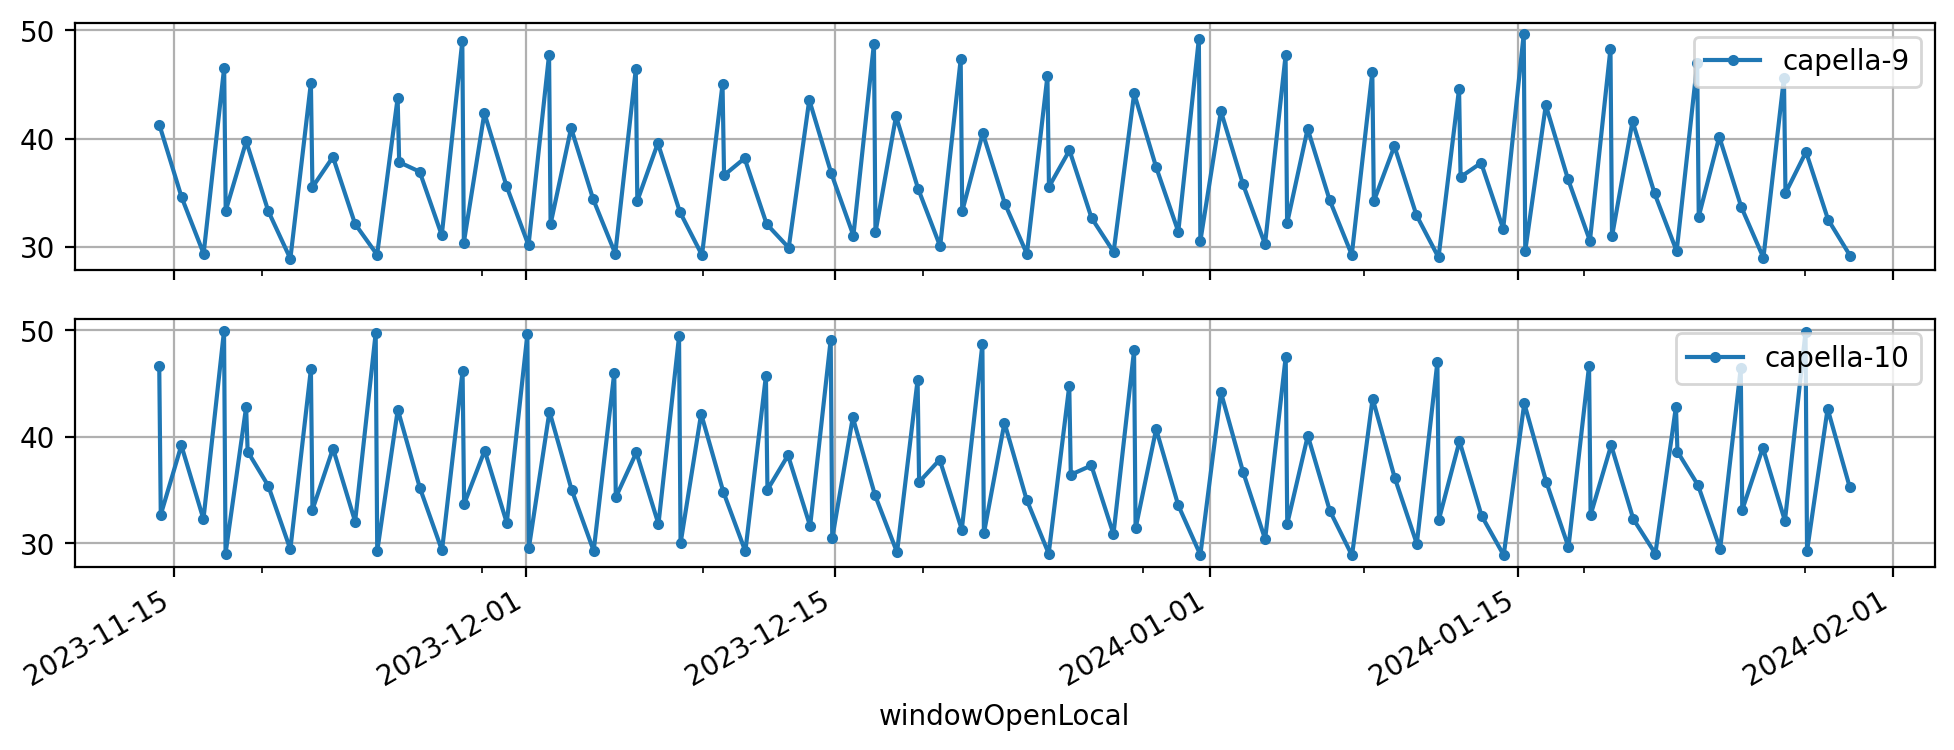

In [10]:
df9 = df[df.spacecraftId == 9]
df10 = df[df.spacecraftId == 10]

fig,(ax,ax1) = plt.subplots(2,1, figsize=(12,4), sharex=True)

#df.plot(x='windowOpenLocal', y='look_angle', ax=ax, color='k', linewidth=0.5, linestyle='--', label=None)
#plt.plot(df.windowOpenLocal, df.look_angle, color='k', linewidth=0.5, linestyle='--')
df9.plot(x='windowOpenLocal', y='look_angle', marker='.',label='capella-9', ax=ax)
ax.grid(True)
df10.plot(x='windowOpenLocal', y='look_angle', marker='.',label='capella-10', ax=ax1)
plt.grid(True)

In [11]:
#import matplotlib
# Custom matplotlib marker (ascending left looking)
#m_al = matplotlib.markers.MarkerStyle(marker="2") # 'tri-up marker'
#m_al = matplotlib.markers.MarkerStyle(marker="^")
#m_al._transform = m_al.get_transform().rotate_deg(45) #counter-clockwise from north

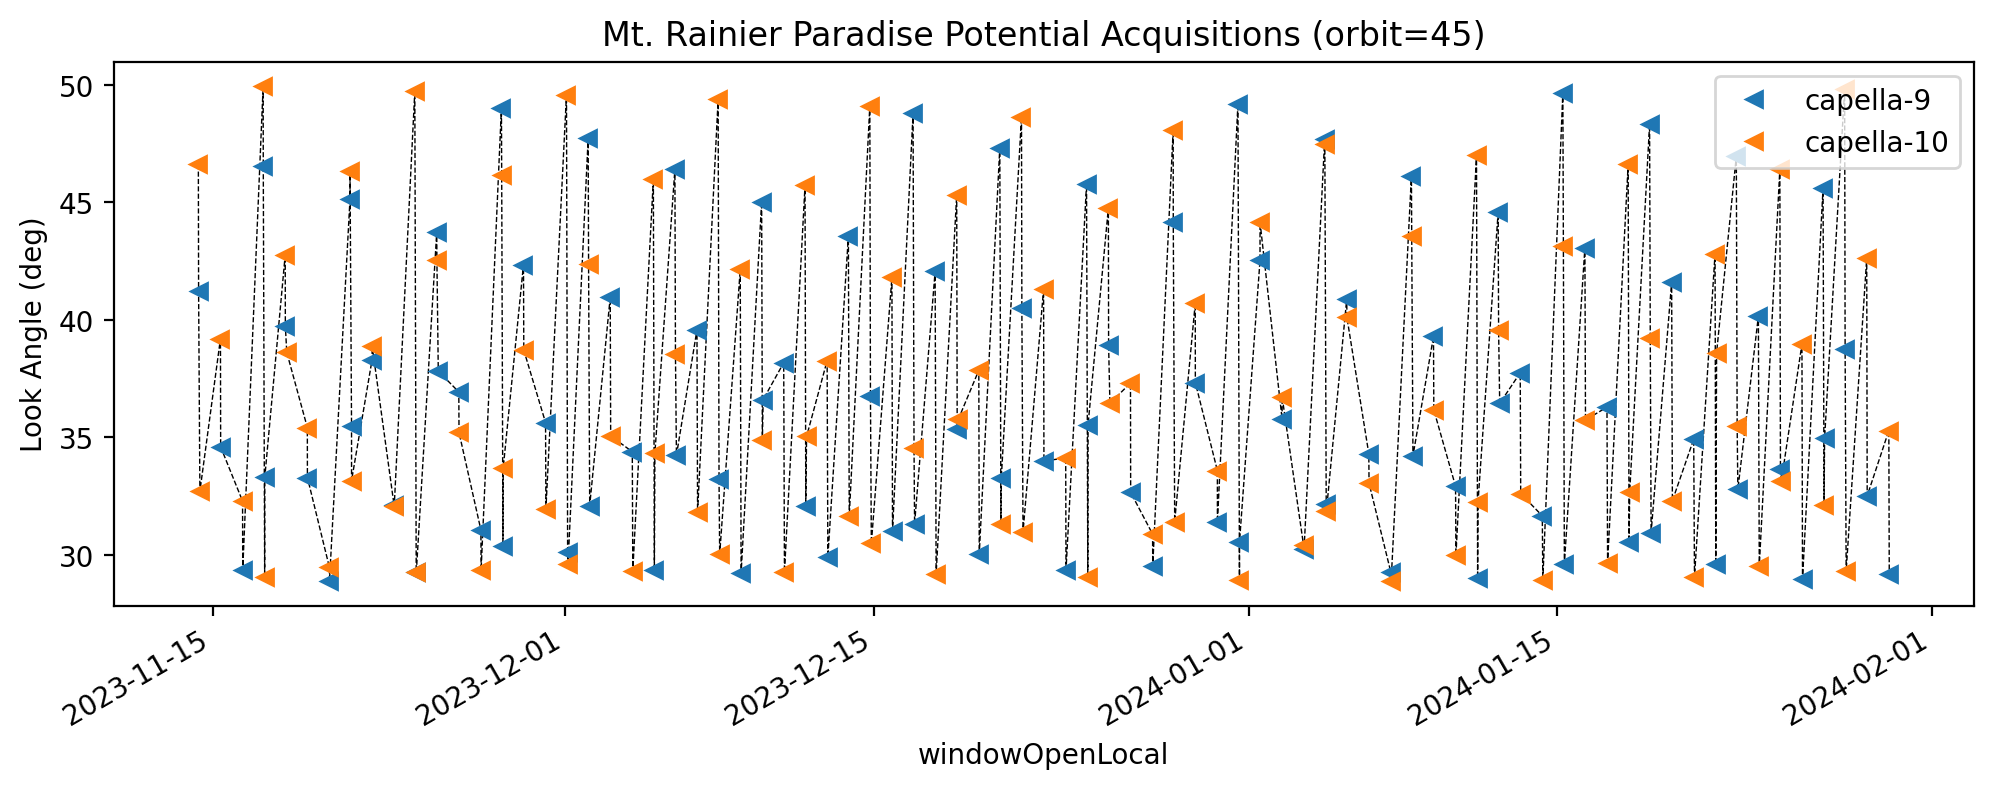

In [12]:
df9 = df[df.spacecraftId == 9]
df10 = df[df.spacecraftId == 10]

fig,ax = plt.subplots(figsize=(12,4))

#df.plot(x='windowOpenLocal', y='look_angle', ax=ax, color='k', linewidth=0.5, linestyle='--', label=None)
plt.plot(df.windowOpenLocal, df.look_angle, color='k', linewidth=0.5, linestyle='--')
df9.plot(x='windowOpenLocal', y='look_angle', marker='<', linestyle='none', label='capella-9', ax=ax)
df10.plot(x='windowOpenLocal', y='look_angle', marker='<', linestyle='none', label='capella-10', ax=ax)

plt.ylabel('Look Angle (deg)')
plt.title('Mt. Rainier Paradise Potential Acquisitions (orbit=45)');

In [13]:
# Time difference for all acquisition types
df['time_diff'] = df.windowOpenLocal.diff(1)
cols = ['windowOpenLocal','spacecraftId','time_diff']
#df[cols].sort_values('time_diff')
df.time_diff.describe()

count                          196
mean     0 days 09:23:37.360255102
std      0 days 10:47:14.516668714
min         0 days 00:00:23.793000
25%         0 days 00:29:28.508750
50%         0 days 01:07:58.003500
75%         0 days 22:21:42.521250
max         0 days 23:59:58.837000
Name: time_diff, dtype: object

In [14]:
# Max = 24 hours, min=24 seconds!
# Can search by highest density observations
# ? At what point are observations mutually exclusive ?
min_separation = df.time_diff.idxmin()
df.loc[min_separation-1:min_separation+1]

,center,centerEcef,spacecraftId,accessId,accessrequestId,tileId,windowOpen,windowClose,windowOpenLocal,windowCloseLocal,...,orbit_state,observation_direction,accessProperties.localTime,accessProperties.azimuthOpen,accessProperties.azimuthClose,accessProperties.elevationMin,accessProperties.elevationMax,look_angle,accessProperties.offNadirMax,time_diff
122,"[-121.74456210652252, 46.79641971461287, 1589]","[-2301990.610013558, -3720764.5125233727, 4627...",10,210ed842-0079-41a1-a8c8-d9194f5f0a6b,739a3145-da70-42d0-90e5-d9a6905e1e97,5913ef0d-714b-46e3-aae3-f1daee3dd1dc,2023-12-31T21:57:52.111Z,2023-12-31T22:00:55.610Z,2023-12-31 13:57:52.111000+00:00,2023-12-31T14:00:55.610Z,...,ascending,left,49927,239.139491,115.481385,33.272367,58.122890,28.934485,49.999509,0 days 01:38:58.174000
123,"[-121.74456144254492, 46.79641971954039, 1589]","[-2301990.5666849925, -3720764.5388605706, 462...",9,3c1f4817-b136-4c83-bb1b-40bf5f56db50,739a3145-da70-42d0-90e5-d9a6905e1e97,18225567-874b-4fd3-9f61-7e2e48f6d5b6,2023-12-31T21:58:15.904Z,2023-12-31T22:00:50.051Z,2023-12-31 13:58:15.904000+00:00,2023-12-31T14:00:50.051Z,...,ascending,left,49936,241.826282,127.518760,33.380732,56.382463,30.521354,49.999948,0 days 00:00:23.793000
124,"[-121.74456144254492, 46.79641971954039, 1589]","[-2301990.5666849925, -3720764.5388605706, 462...",9,6e98dee0-46ef-4515-b70a-8e5bfc4de8f3,0a72f395-f759-4715-b320-0ffae5d3d47e,cf1a7f37-2c6b-410f-b96d-9436977a7b98,2024-01-01T20:19:57.762Z,2024-01-01T20:22:26.279Z,2024-01-01 12:19:57.762000+00:00,2024-01-01T12:22:26.279Z,...,ascending,left,44035,204.677286,121.252585,33.347748,42.510601,42.532589,49.999770,0 days 22:21:41.858000


In [15]:
# Plot local hour and minute
df['hour'] = df.windowOpenLocal.dt.hour
df['minute'] = df.windowOpenLocal.dt.minute
df['local_time'] = df.hour + df.minute/60

df9 = df[df.spacecraftId == 9]
df10 = df[df.spacecraftId == 10]

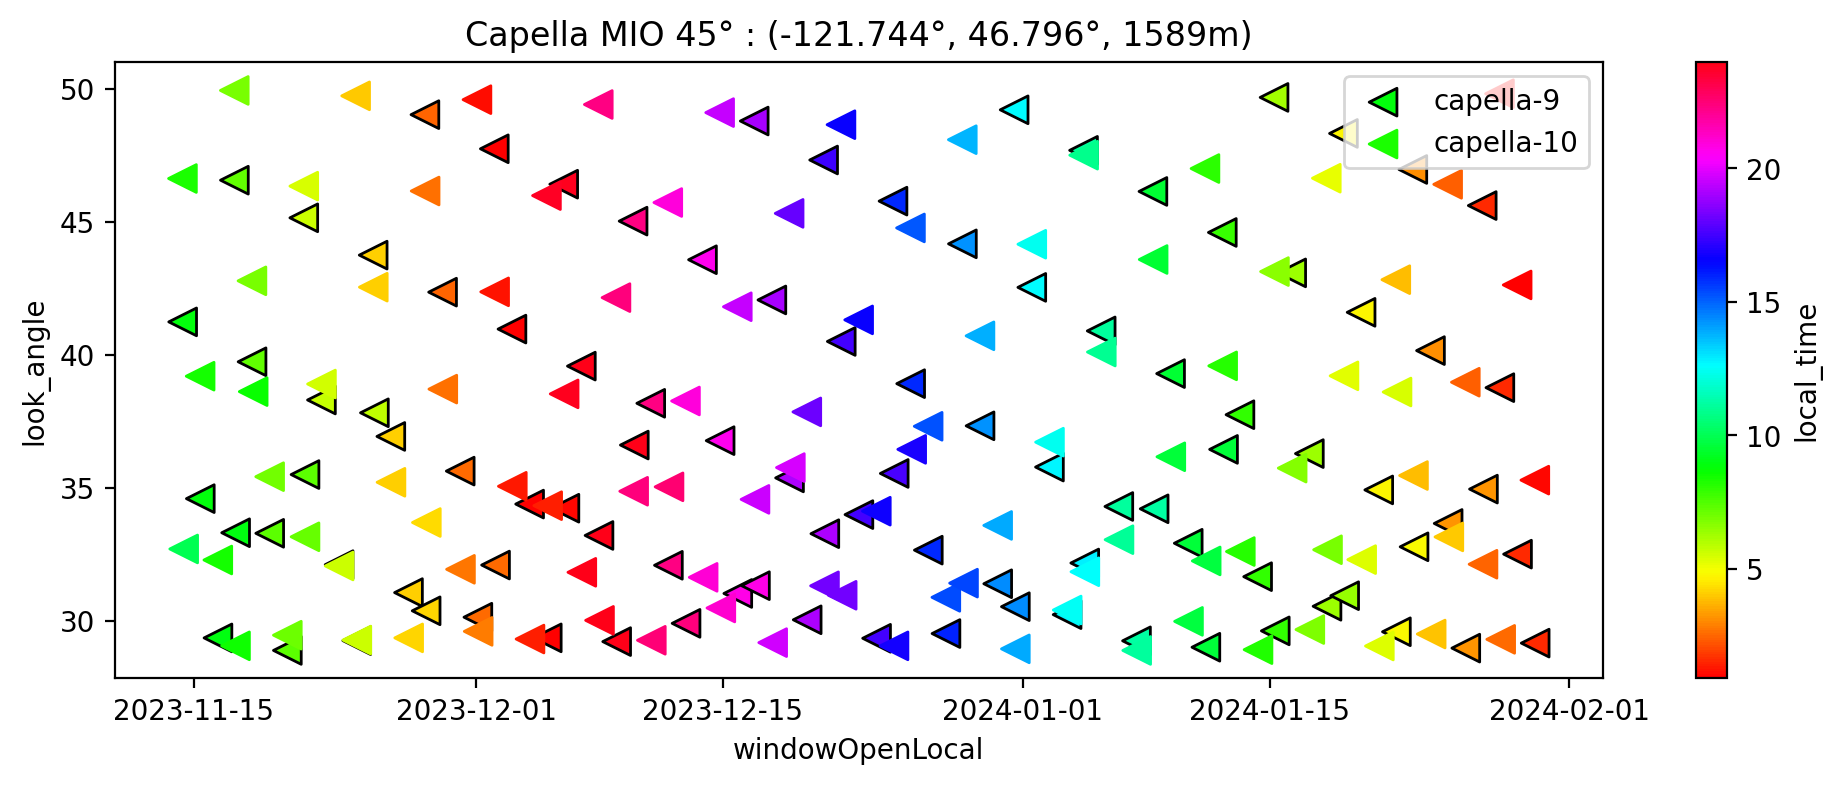

In [16]:
#ar.plot(x='windowOpenLocal', y='hour', marker='>', label='ascending_right');
#cmap = plt.cm.get_cmap('hsv', 23) More trouble than it's worth showing 24 discrete colors!
fig,ax = plt.subplots(figsize=(12,4))
df9.plot(kind='scatter', x='windowOpenLocal', y='look_angle', c='local_time', marker='<', s=100, edgecolors='k', label='capella-9', ax=ax, cmap='hsv', colorbar=None)
df10.plot(kind='scatter', x='windowOpenLocal', y='look_angle', c='local_time', marker='<', s=100, label='capella-10', ax=ax, cmap='hsv')

plt.title('Capella MIO 45° : (-121.744°, 46.796°, 1589m)');

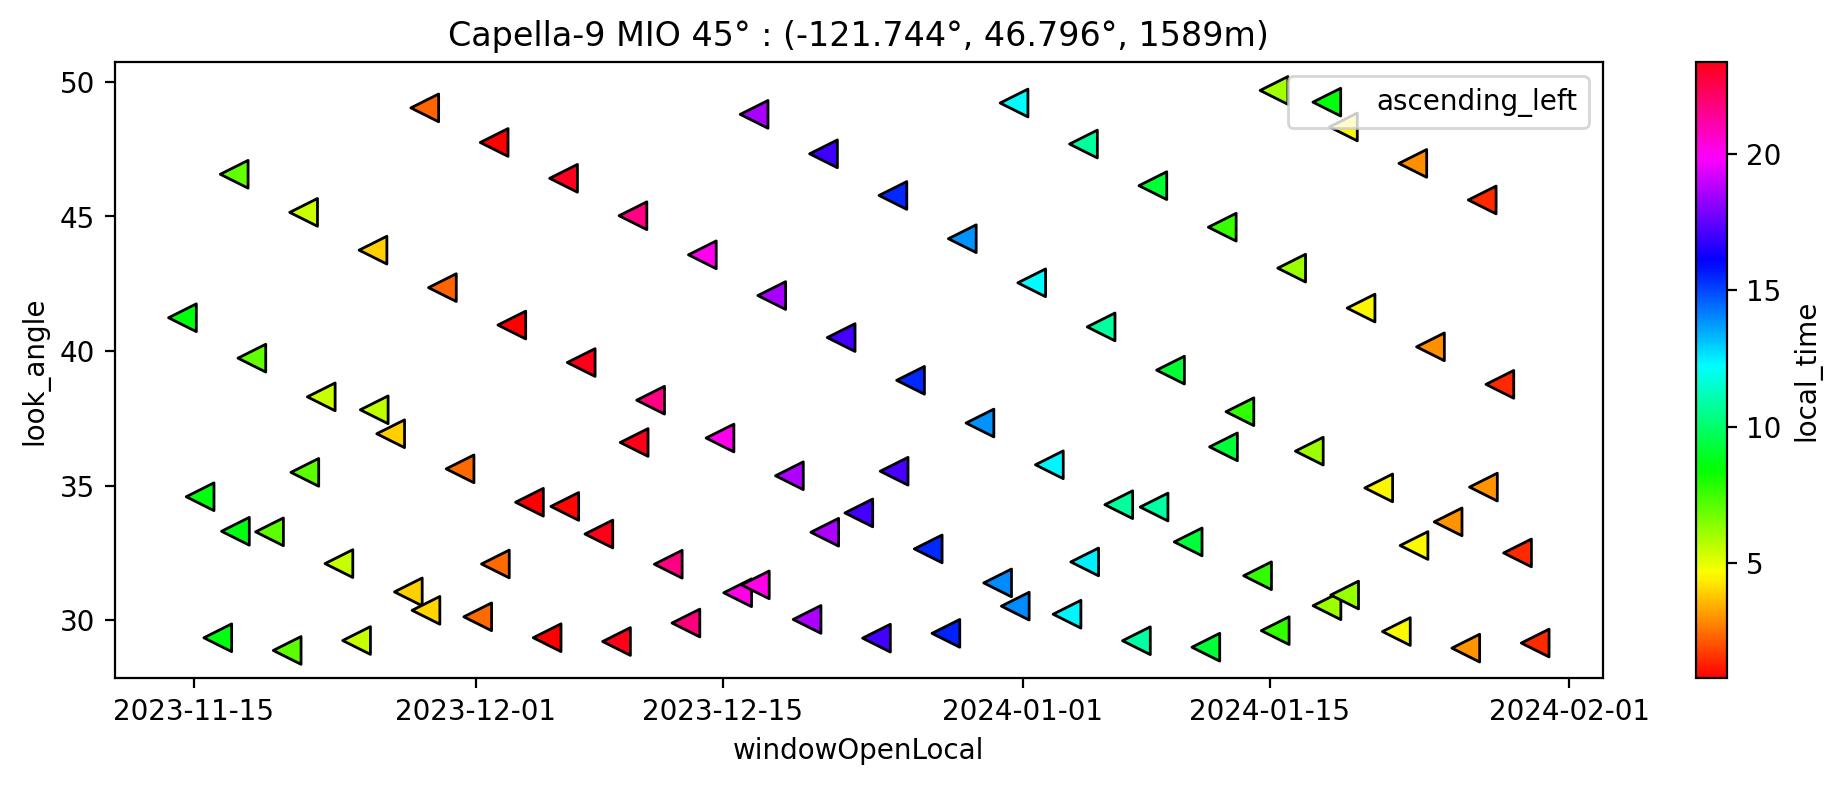

In [17]:
fig,ax = plt.subplots(figsize=(12,4))
df9.plot(kind='scatter', x='windowOpenLocal', y='look_angle', c='local_time', marker='<', s=100, edgecolors='k', label='ascending_left', ax=ax, cmap='hsv')
plt.title('Capella-9 MIO 45° : (-121.744°, 46.796°, 1589m)');

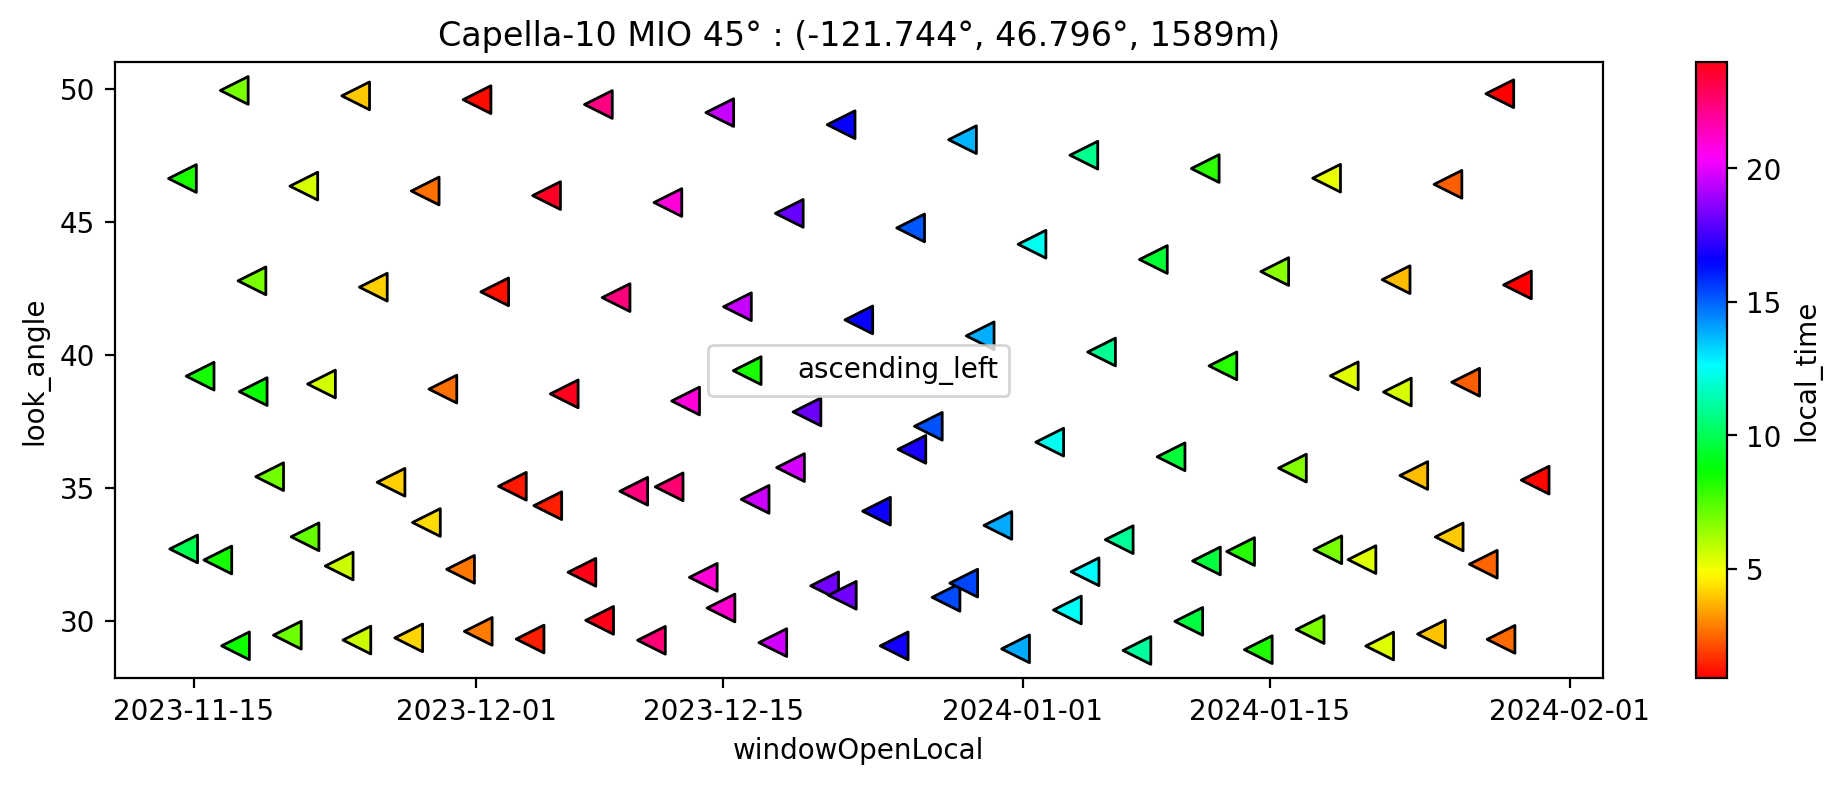

In [18]:
fig,ax = plt.subplots(figsize=(12,4))
df10.plot(kind='scatter', x='windowOpenLocal', y='look_angle', c='local_time', marker='<', s=100, edgecolors='k', label='ascending_left', ax=ax, cmap='hsv')
plt.title('Capella-10 MIO 45° : (-121.744°, 46.796°, 1589m)');

In [19]:
# Best temporal sampling across all incidence angles
tmp = df.set_index('windowOpenLocal')
tmp.resample('D').apply({'accessId':'count'}).describe()

,accessId
count,78.000000
mean,2.525641
std,0.618426
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [20]:
# Restricting to look_angle <35
tmp = tmp[tmp.look_angle<35]
tmp.resample('D').apply({'accessId':'count'}).describe()

,accessId
count,78.000000
mean,1.179487
std,0.734026
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000
